## **Task 2: Forest Cover Type Classification**

## **1. Importing Modules and Dataset**

In [40]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/forest-cover-type-dataset/covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


## **2. EDA - Data Understanding and Cleaning.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
df['Cover_Type'] = df.Cover_Type.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Elevation                           581012 non-null  int64   
 1   Aspect                              581012 non-null  int64   
 2   Slope                               581012 non-null  int64   
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64   
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64   
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64   
 6   Hillshade_9am                       581012 non-null  int64   
 7   Hillshade_Noon                      581012 non-null  int64   
 8   Hillshade_3pm                       581012 non-null  int64   
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64   
 10  Wilderness_Area1                    581012 non-null  int64   
 11  Wilderness_Ar

In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [16]:
df.nunique()

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

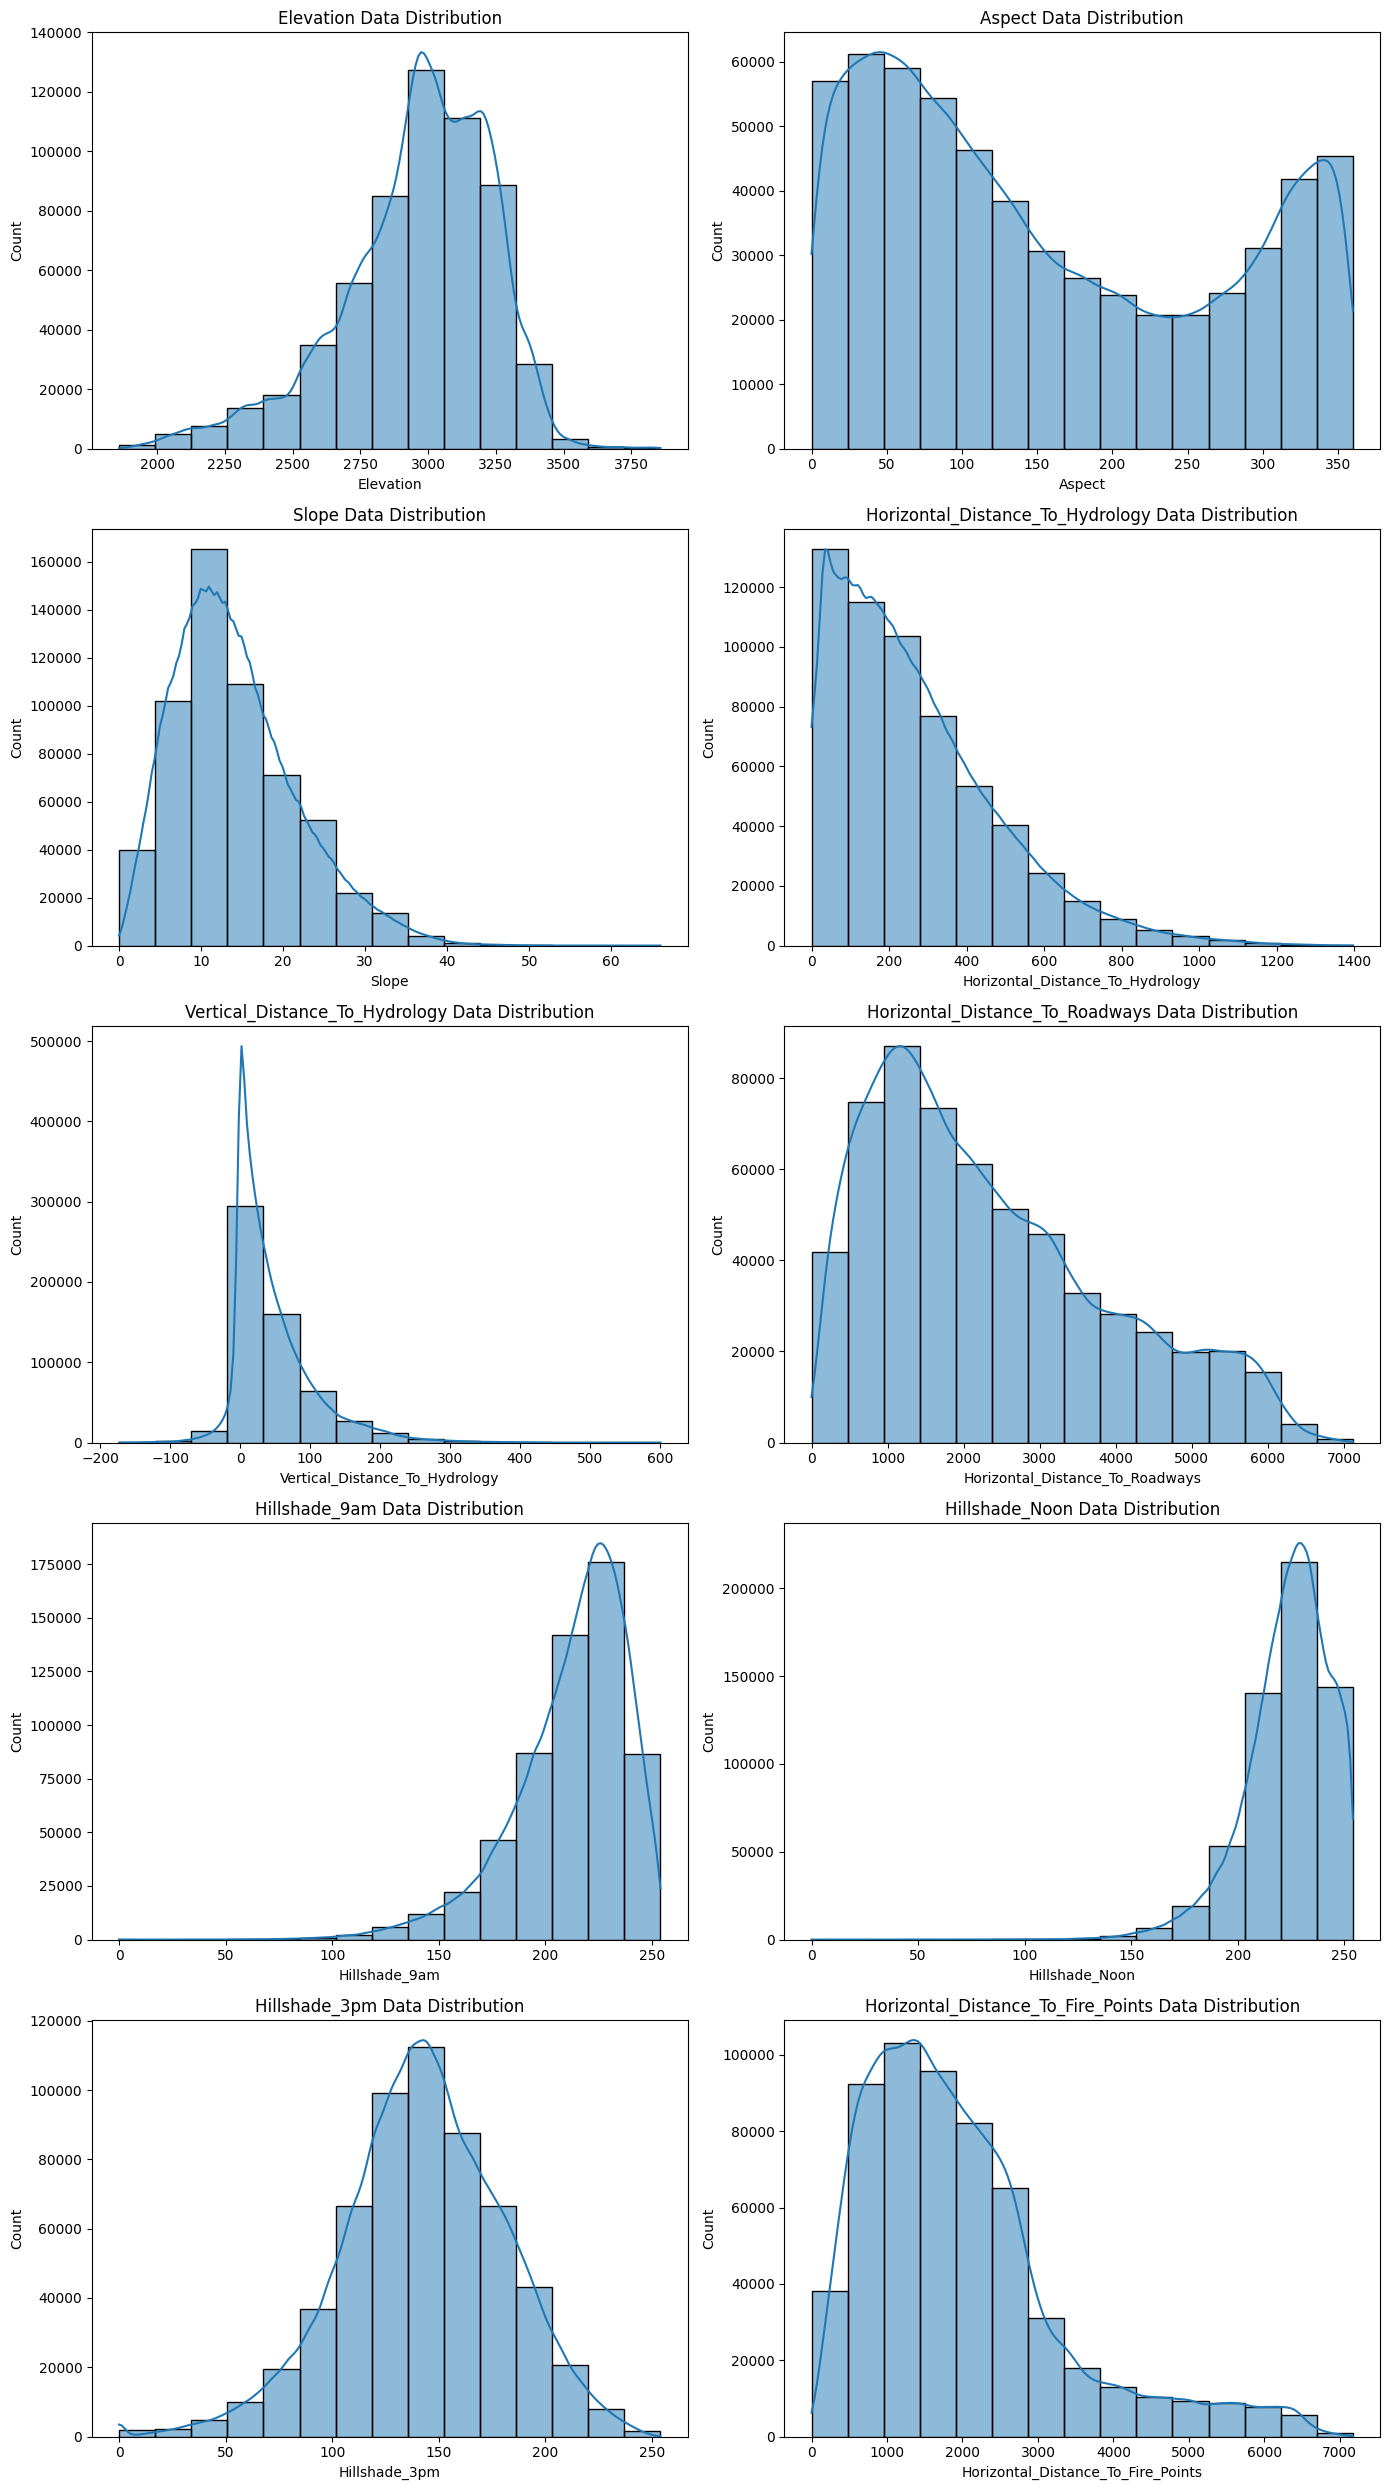

In [20]:
columns_to_plot = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]
num_plots = len(columns_to_plot)

num_cols_per_row = 2
num_rows = math.ceil(num_plots / num_cols_per_row)

plt.figure(figsize=(num_cols_per_row * 7, num_rows * 5)) 

for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    sns.histplot(df[col], kde=True, bins=15, edgecolor='k')
    plt.title(f'{col} Data Distribution')

plt.tight_layout()
plt.show()

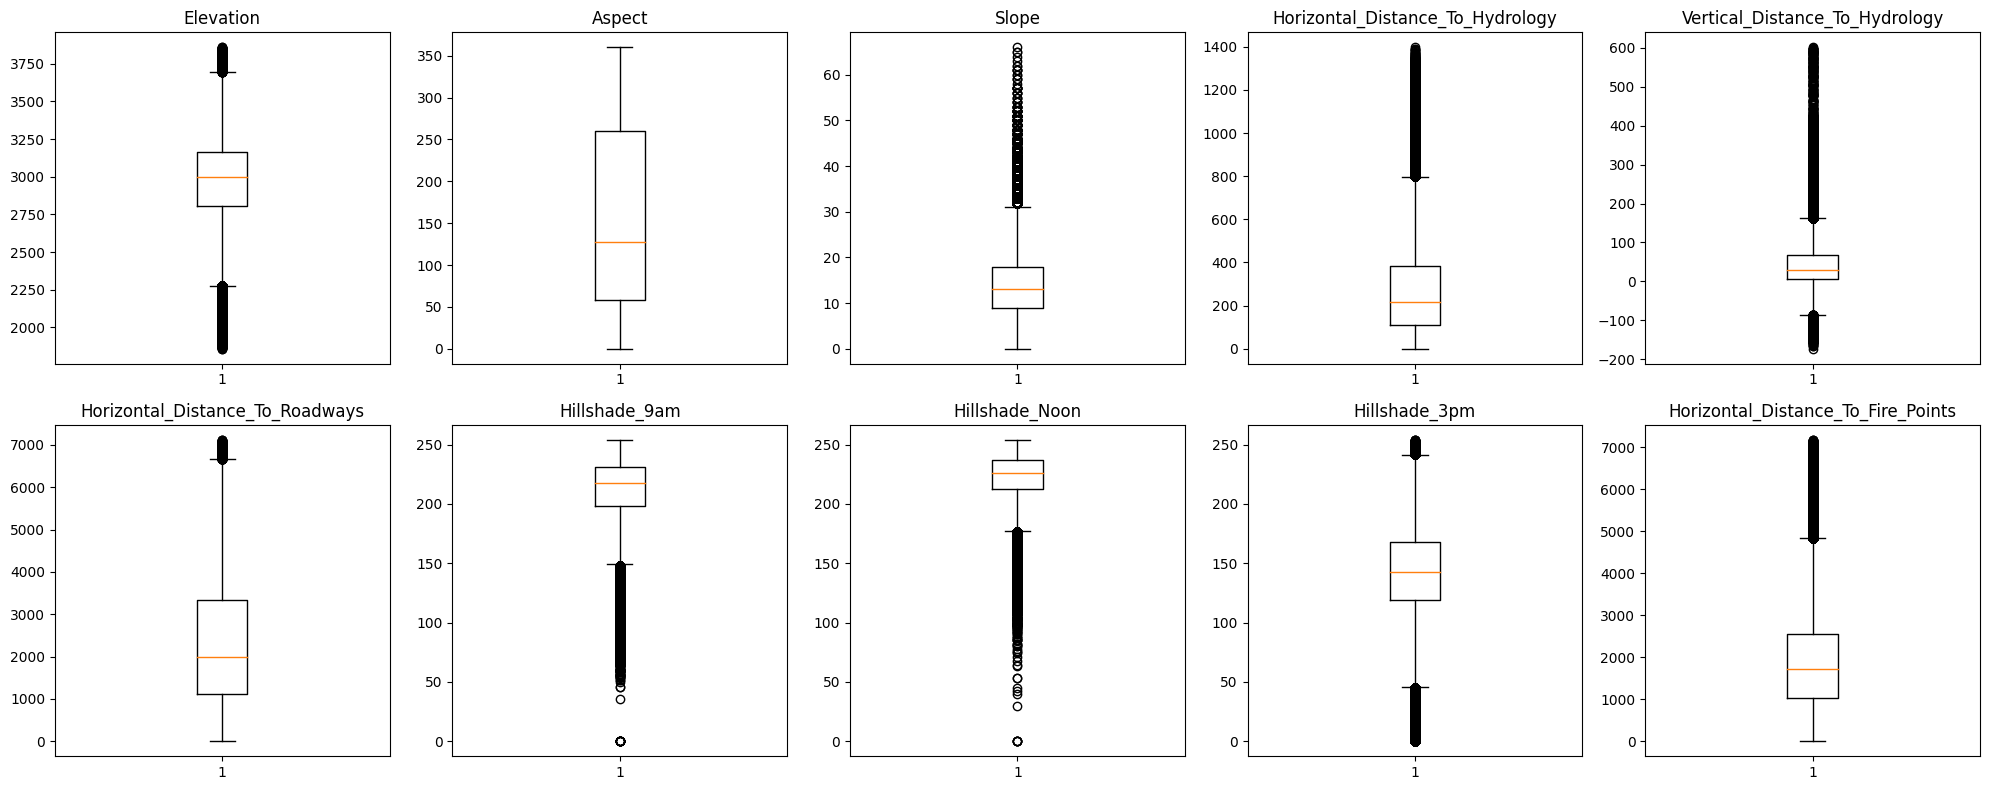

In [21]:
numCol = columns_to_plot
num_plots = len(numCol)

num_cols_per_row = 5 
num_rows = math.ceil(num_plots / num_cols_per_row)


plt.figure(figsize=(num_cols_per_row * 4, num_rows * 4)) 
for i, col in enumerate(numCol):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [22]:
for col in numCol:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENNCE = Q3 + 1.5 * IQR
    LO_FENNCE = Q1 - 1.5 * IQR
    lowOutlier = df[df[col] < LO_FENNCE][col].values
    upOutlier = df[df[col] > UP_FENNCE][col].values
    df[col].replace(lowOutlier, LO_FENNCE, inplace=True)
    df[col].replace(upOutlier, UP_FENNCE, inplace=True)

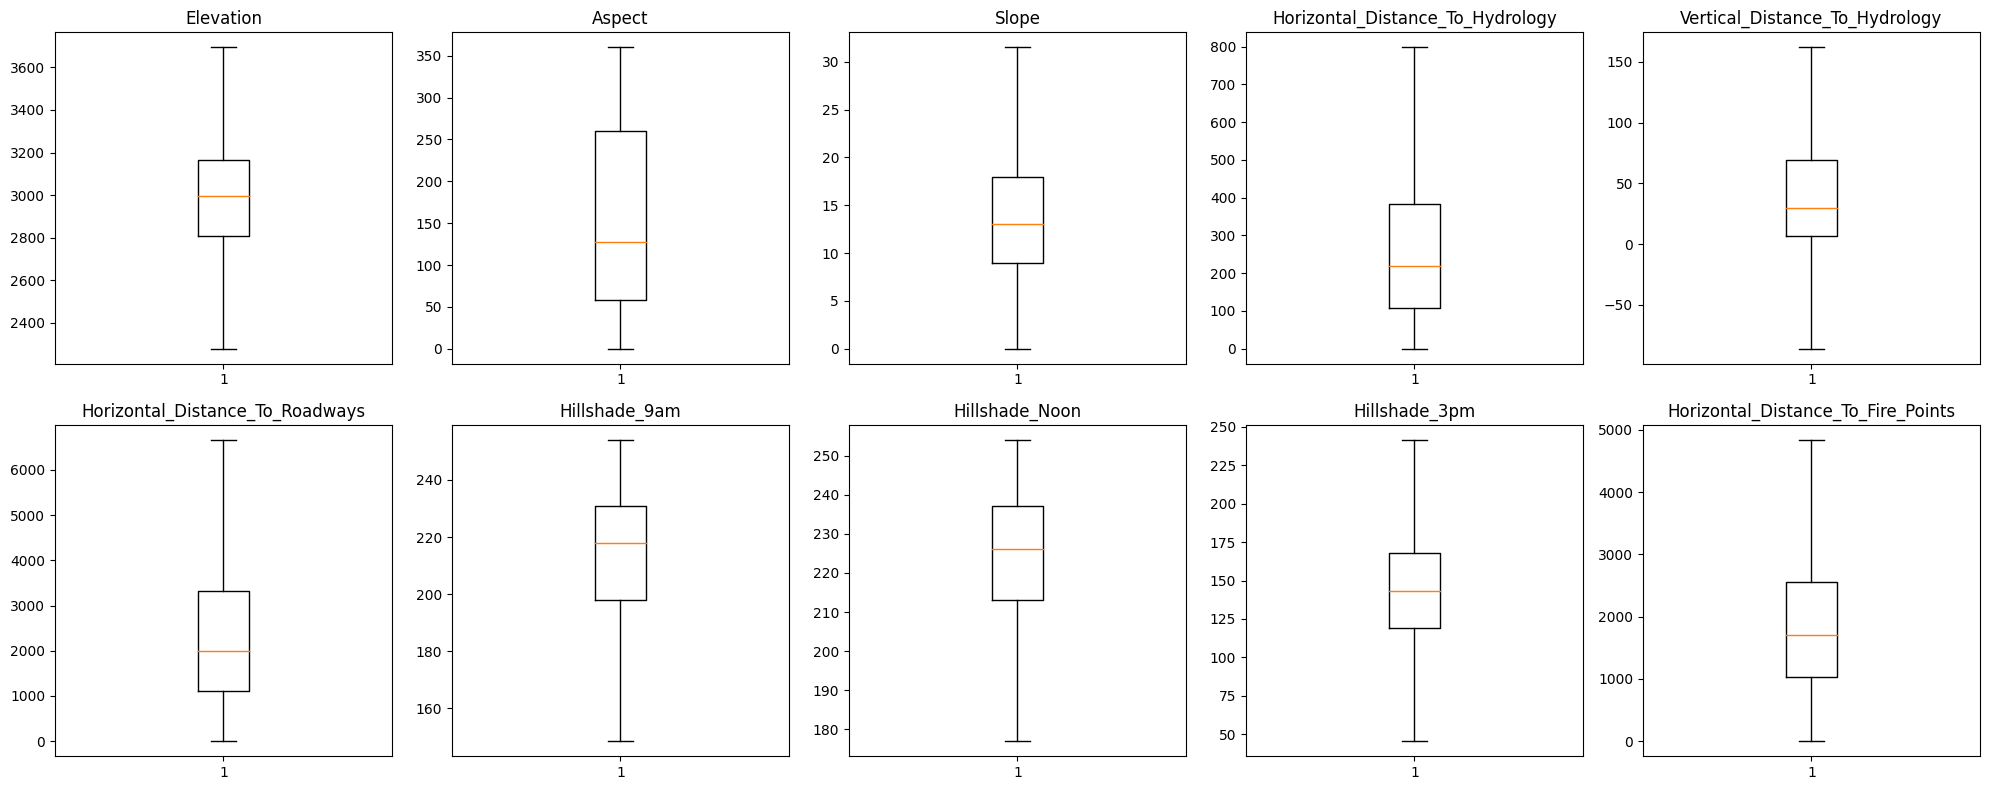

In [23]:
plt.figure(figsize=(num_cols_per_row * 4, num_rows * 4)) 
for i, col in enumerate(numCol):
    plt.subplot(num_rows, num_cols_per_row, i + 1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [30]:
x=df.drop(['Cover_Type'] ,axis=1)
y=df['Cover_Type']

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=26, stratify=y)

## **3. Model Training & Evaluation**

### **- Decision Tree**

In [34]:
from sklearn import tree

dtree = tree.DecisionTreeClassifier(max_depth=5, random_state=26)
dtree = dtree.fit(x_train , y_train)

In [38]:
y_pred = dtree.predict(x_test)

#evaluations
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[29474 11866    14     0    12     2  1000]
 [12132 43743   579     2    78    11   116]
 [    0  1219  5794    96    10    32     0]
 [    0    28   339   182     0     0     0]
 [    0  1750    63     0    86     0     0]
 [    0  1208  2123    29     1   112     0]
 [ 1956    15     0     0     0     0  2131]]

Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.70      0.69     42368
           2       0.73      0.77      0.75     56661
           3       0.65      0.81      0.72      7151
           4       0.59      0.33      0.42       549
           5       0.46      0.05      0.08      1899
           6       0.71      0.03      0.06      3473
           7       0.66      0.52      0.58      4102

    accuracy                           0.70    116203
   macro avg       0.64      0.46      0.47    116203
weighted avg       0.70      0.70      0.69    116203



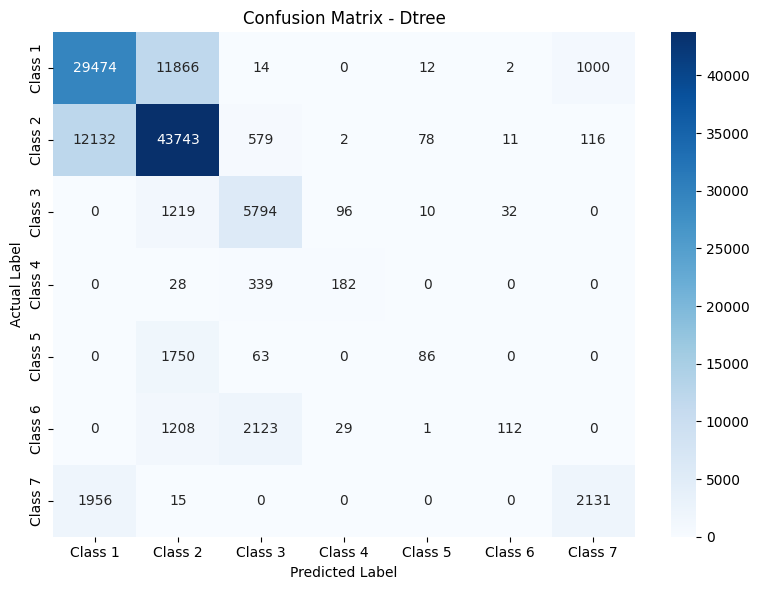

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],
            yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Dtree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

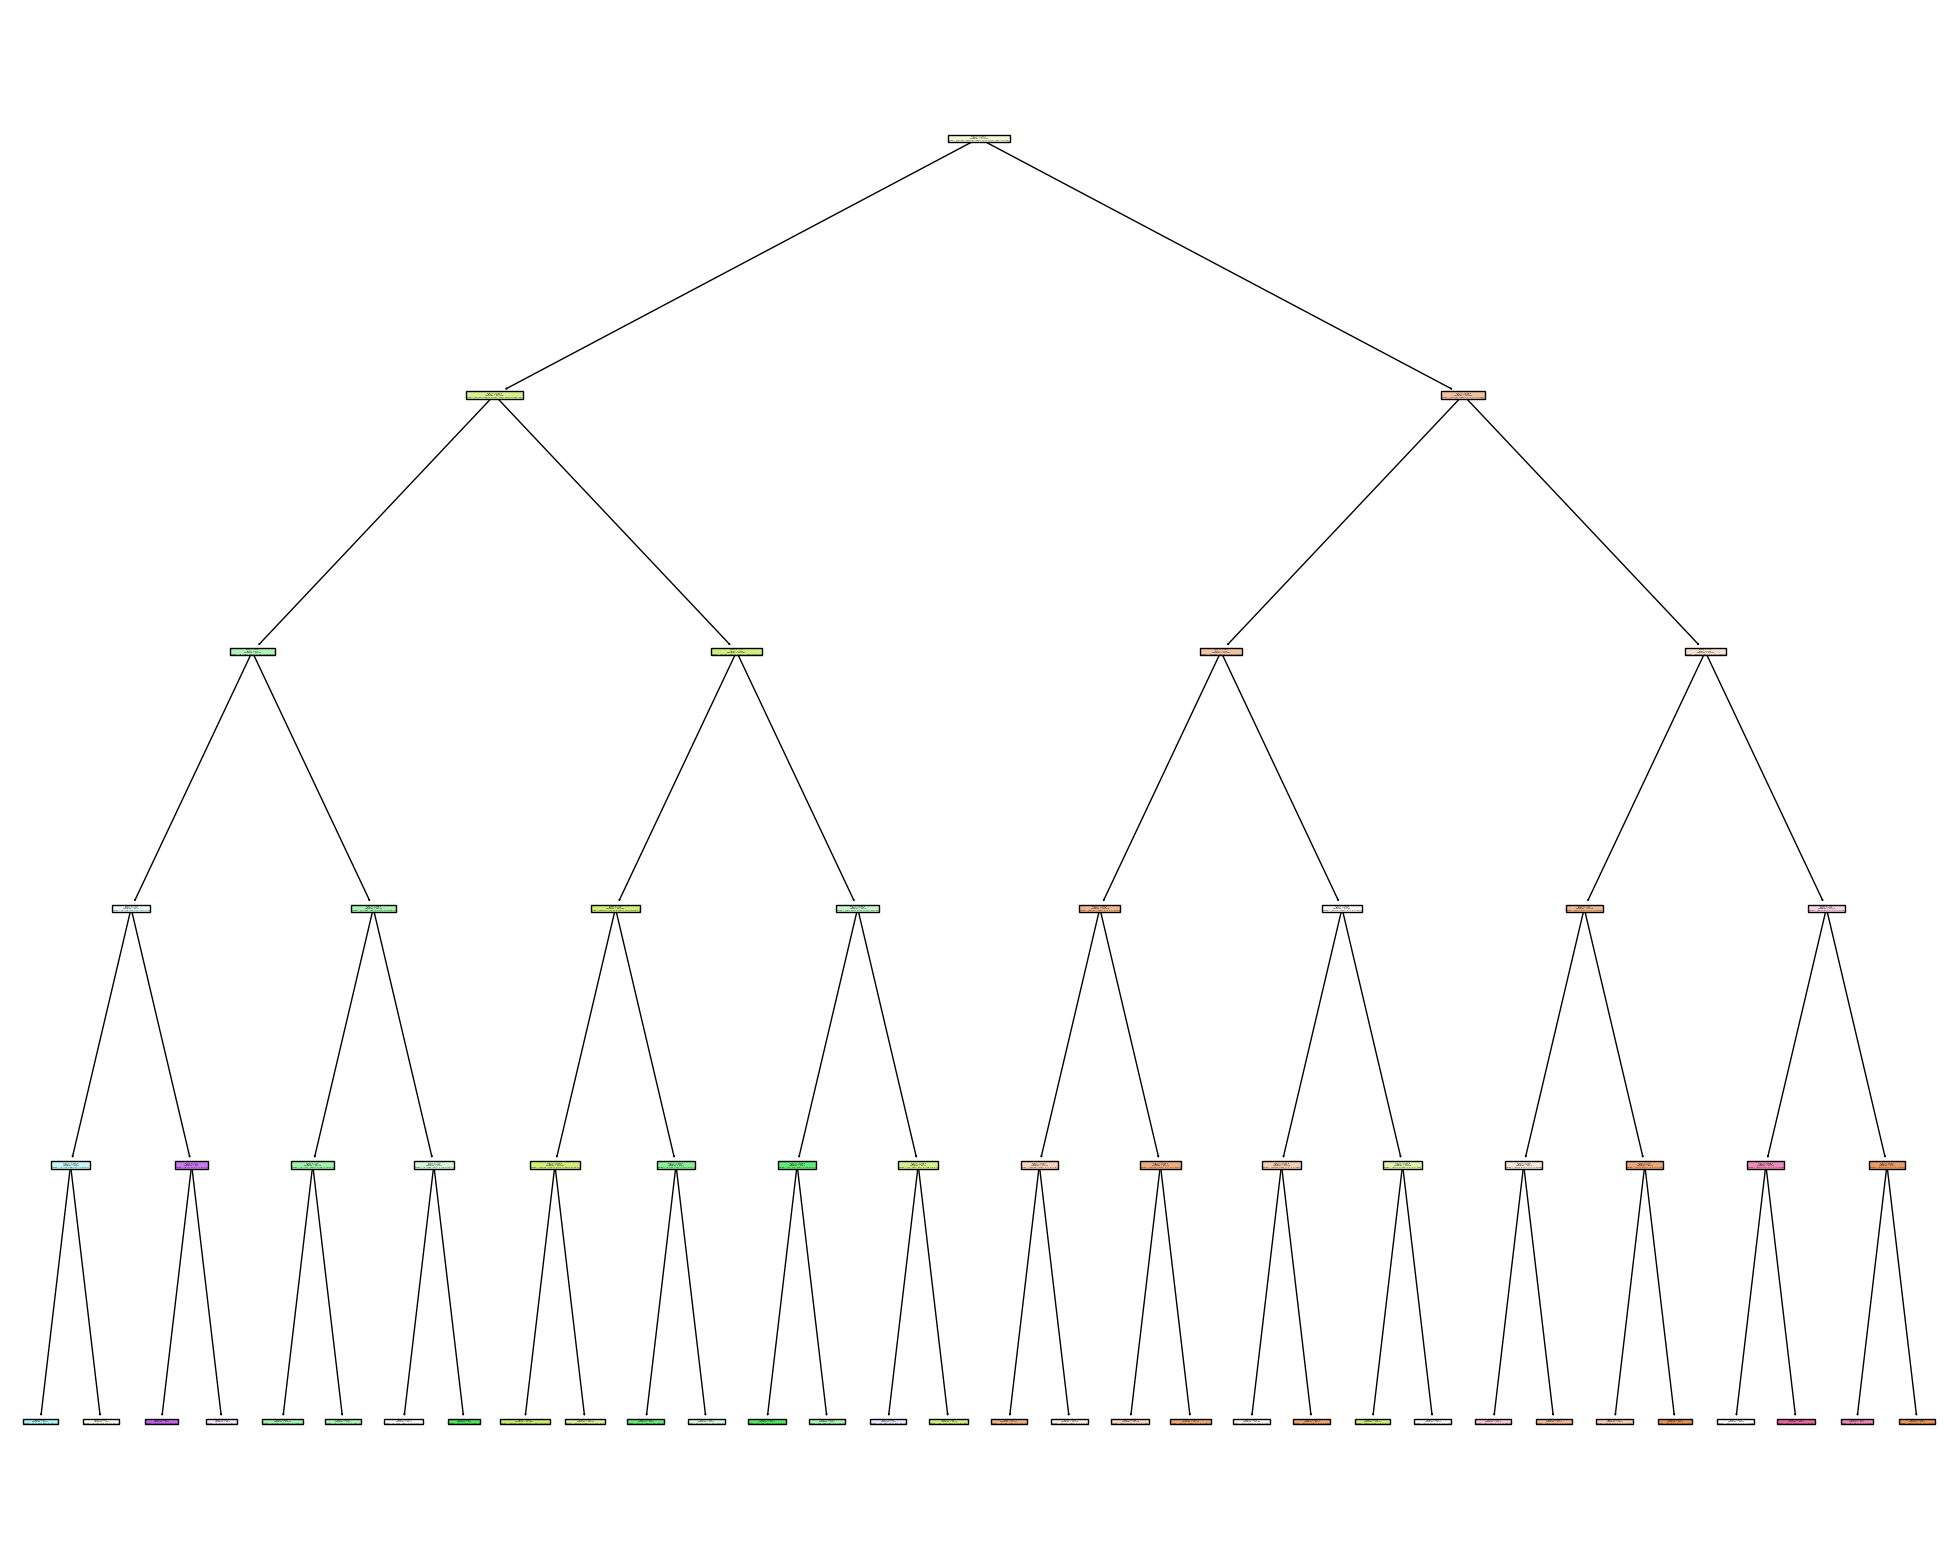

In [58]:
plt.figure(figsize=(25, 20))
_ = tree.plot_tree(dtree, filled=True)

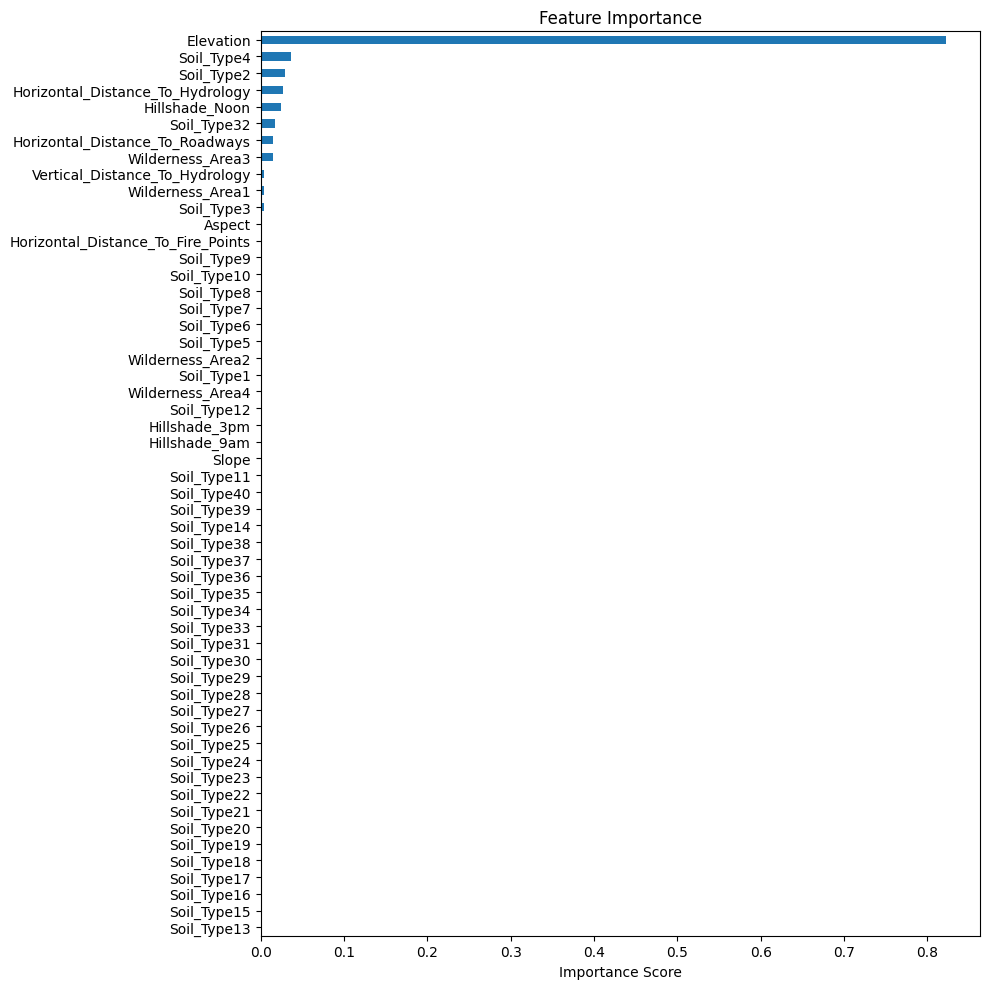

In [67]:
#feature importance scale
dtree_importance = pd.Series(dtree.feature_importances_, index=x.columns)
dtree_importance.sort_values().plot(kind='barh', title='Feature Importance', figsize=(10, 10))
plt.xlabel("Importance Score")
plt.tight_layout()

----

## **4. Bonus Work: Compare different & Perform hyperparameter tuning (with grid search)**

### **- Logistic Regression**

In [52]:
logmodel = LogisticRegression(max_iter=350)

logmodel.fit(x_train , y_train)

LogisticRegression(max_iter=350)

In [53]:
pred  = logmodel.predict(x_test)

#evaluations
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Confusion Matrix:
 [[27860 14380    17     0     0     1   110]
 [10975 44431  1212     0     0    38     5]
 [    2  2515  4449     0     0   185     0]
 [    0    38   508     0     0     3     0]
 [   45  1796    58     0     0     0     0]
 [   20  1950  1468     0     0    35     0]
 [ 3837   224     0     0     0     0    41]]

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.66      0.65     42368
           2       0.68      0.78      0.73     56661
           3       0.58      0.62      0.60      7151
           4       0.00      0.00      0.00       549
           5       0.00      0.00      0.00      1899
           6       0.13      0.01      0.02      3473
           7       0.26      0.01      0.02      4102

    accuracy                           0.66    116203
   macro avg       0.33      0.30      0.29    116203
weighted avg       0.62      0.66      0.63    116203



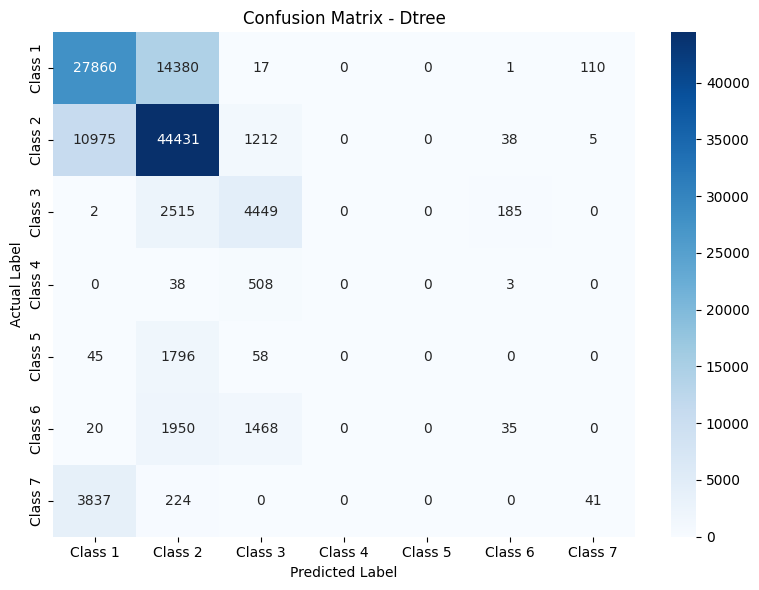

In [54]:
cm_lr = confusion_matrix(y_test, pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],
            yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Dtree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

### **- Hyperparameters Tunning**

In [59]:
from sklearn.model_selection import GridSearchCV

In [68]:
dt = tree.DecisionTreeClassifier(random_state=26)

In [69]:
params = {
    'max_depth': [None, 5, 10],  
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 10], 
    'criterion': ["gini", "entropy"], 
    'max_features': ['sqrt', None],
    'class_weight': [None, 'balanced']
}

In [70]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [71]:
grid_search.fit(x_train , y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=26), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10]},
             scoring='accuracy', verbose=1)

In [72]:
score_df = pd.DataFrame(grid_search.cv_results_)
dt_best = grid_search.best_estimator_

In [81]:
print(dt_best)

DecisionTreeClassifier(criterion='entropy', random_state=26)


In [73]:
pred  = dt_best.predict(x_test)

#evaluations
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Confusion Matrix:
 [[39940  2219     0     0    23     5   181]
 [ 2189 53975   139     1   236   101    20]
 [    2   157  6685    67    19   221     0]
 [    0     0    64   458     0    27     0]
 [   29   237    28     0  1600     4     1]
 [    9   102   255    25     9  3073     0]
 [  177    26     0     0     0     0  3899]]

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.93      0.93      7151
           4       0.83      0.83      0.83       549
           5       0.85      0.84      0.85      1899
           6       0.90      0.88      0.89      3473
           7       0.95      0.95      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.91      0.91      0.91    116203
weighted avg       0.94      0.94      0.94    116203



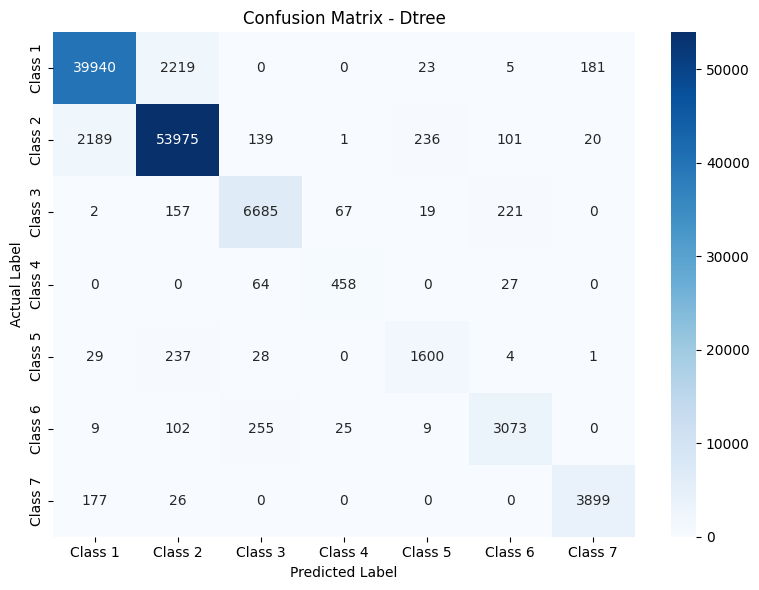

In [74]:
cm_best_dt = confusion_matrix(y_test, pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_dt, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in sorted(y.unique())],
            yticklabels=[f'Class {i}' for i in sorted(y.unique())])
plt.title("Confusion Matrix - Dtree")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.tight_layout()

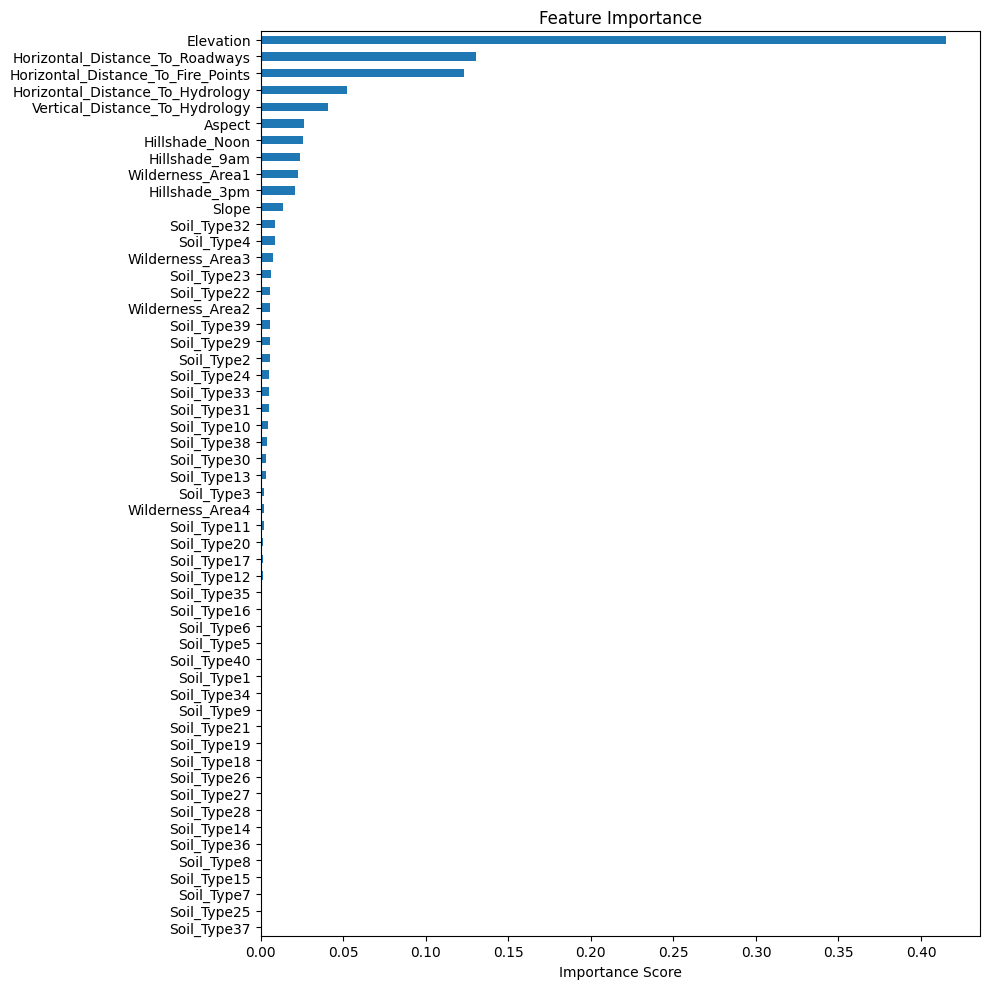

In [80]:
#feature importance scale
dt_best_importance = pd.Series(dt_best.feature_importances_, index=x.columns)
dt_best_importance.sort_values().plot(kind='barh', title='Feature Importance', figsize=(10, 10))
plt.xlabel("Importance Score")
plt.tight_layout()